In [1]:
import numpy as np 
import pandas as pd
import datetime as dt
import time
import matplotlib.pyplot as pt
import copy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_excel('card transactions.xlsx')

In [3]:
df

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0


In [4]:
df.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [5]:
df.tail()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0
96752,96753,5142243247,2010-12-31,9108347680006,STAPLES NATIONAL #471,NJ,7606.0,P,554.64,0


In [6]:
df.sample(10)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
29384,29385,5142253315,2010-04-21,9900000030406,GSA/CUST SUPPLY CTR 90,WA,98001.0,P,77.22,0
35667,35668,5142273878,2010-05-13,930090121224,FEDEX SHP 05/04/10 AB#,TN,38118.0,P,8.31,0
25767,25768,5142265645,2010-04-07,970902100226,VHG LABS INC,NH,3109.0,P,417.05,0
7072,7073,5142295024,2010-02-01,5509006296254,FEDEX SHP 01/25/10 AB#,TN,38118.0,P,3.62,0
36507,36508,5142276306,2010-05-16,410000971343,SIGMA-ALDRICH,MO,63103.0,P,14.63,0
82809,82810,5142158538,2010-10-22,4353000719908,ACI*AMAZON.COM INC,WA,98101.0,P,397.87,0
43270,43271,5142180432,2010-06-08,8078200641472,NEWSLIBRARY,PA,19103.0,P,1.95,0
35252,35253,5142189108,2010-05-12,4353000719908,AMAZON.COM *SUPERSTOR,WA,98101.0,P,53.94,0
77387,77388,5142138263,2010-09-26,4503082476300,OFFICE DEPOT #1082,MD,20763.0,P,60.80,0
88751,88752,5142196870,2010-11-22,48163715970,WAYNE'S DRY CLEANERS,NC,27514.0,P,75.30,0


In [7]:
df.shape

(96753, 10)

Remove all records that do not have a value of "P" in the Transtype data field.



In [8]:
df_P = df.loc[df['Transtype'] == 'P']
print(len(df_P))

96398


In [9]:
df.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud'],
      dtype='object')

In [10]:
df.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [11]:
df.isnull().any()

Recnum               False
Cardnum              False
Date                 False
Merchnum              True
Merch description    False
Merch state           True
Merch zip             True
Transtype            False
Amount               False
Fraud                False
dtype: bool

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


In [13]:
df.Transtype.unique()

array(['P', 'D', 'A', 'Y'], dtype=object)

Remove all records that do not have a value of "P" in the Transtype data field.



In [14]:
df_P = df.loc[df['Transtype'] == 'P']
print(len(df_P))
df_P.head()

96398


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [15]:
df.Date.unique()

<DatetimeArray>
['2010-01-01 00:00:00', '2010-01-02 00:00:00', '2010-01-03 00:00:00',
 '2010-01-04 00:00:00', '2010-01-05 00:00:00', '2010-01-06 00:00:00',
 '2010-01-07 00:00:00', '2010-01-08 00:00:00', '2010-01-09 00:00:00',
 '2010-01-10 00:00:00',
 ...
 '2010-12-22 00:00:00', '2010-12-23 00:00:00', '2010-12-24 00:00:00',
 '2010-12-25 00:00:00', '2010-12-26 00:00:00', '2010-12-27 00:00:00',
 '2010-12-28 00:00:00', '2010-12-29 00:00:00', '2010-12-30 00:00:00',
 '2010-12-31 00:00:00']
Length: 365, dtype: datetime64[ns]

In [16]:
df.isnull().sum()

Recnum                  0
Cardnum                 0
Date                    0
Merchnum             3375
Merch description       0
Merch state          1195
Merch zip            4656
Transtype               0
Amount                  0
Fraud                   0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90198 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             90198 non-null  int64         
 1   Cardnum            90198 non-null  int64         
 2   Date               90198 non-null  datetime64[ns]
 3   Merchnum           90198 non-null  object        
 4   Merch description  90198 non-null  object        
 5   Merch state        90198 non-null  object        
 6   Merch zip          90198 non-null  float64       
 7   Transtype          90198 non-null  object        
 8   Amount             90198 non-null  float64       
 9   Fraud              90198 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.6+ MB


In [19]:
df.isnull().sum()

Recnum               0
Cardnum              0
Date                 0
Merchnum             0
Merch description    0
Merch state          0
Merch zip            0
Transtype            0
Amount               0
Fraud                0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
df.Cardnum.unique()

array([5142190439, 5142183973, 5142131721, ..., 5142164092, 5142193886,
       5142195065], dtype=int64)

In [22]:
df.Merchnum.unique()

array(['5509006296254', '61003026333', '4503082993600', ...,
       '4503092553800', '3500000004991', '3500000006160'], dtype=object)

In [23]:
df['Merchnum'] = pd.to_numeric(df['Merchnum'], errors='coerce')


In [24]:
df['Merch description'].unique()

array(['FEDEX SHP 12/23/09 AB#', 'SERVICE MERCHANDISE #81',
       'OFFICE DEPOT #191', ..., 'TEXACO     22601220094',
       'BEST BUY      00004226', 'BEST BUY      00001610'], dtype=object)

In [25]:
df['Merch description'].value_counts()

Merch description
SIGMA-ALDRICH             1635
STAPLES #941              1173
FISHER SCI ATL            1092
MWI*MICRO WAREHOUSE        956
CDW*GOVERNMENT INC         872
                          ... 
BERNIES CUSTOM PICTURE       1
TIMBERLINE DODGE INC         1
CAPITAL MEETING PLANNI       1
U OF M-MN EXT SERV CTR       1
BEST BUY      00001610       1
Name: count, Length: 12184, dtype: int64

In [26]:
df['Merch state'].unique()

array(['TN', 'MA', 'MD', 'OH', 'GA', 'IL', 'TX', 'WA', 'WI', 'NJ', 'FL',
       'CA', 'MS', 'VA', 'MO', 'PA', 'NC', 'CT', 'KS', 'OR', 'SC', 'MI',
       'NY', 'MN', 'KY', 'ME', 'CO', 'DC', 'AK', 'IA', 'NH', 'MT', 'OK',
       'NV', 'RI', 'NE', 'AZ', 'NM', 'WV', 'UT', 'ID', 'SD', 'AL', 'DE',
       'LA', 'IN', 'VT', 'ND', 'AR', 'HI', 'WY'], dtype=object)

In [27]:
df['Merch zip'].unique()

array([38118.,  1803., 20706., ...,  3455., 60033., 36043.])

In [28]:
df['Amount'].unique()

array([   3.62,   31.42,  178.49, ...,  243.15, 2202.03,  554.64])

In [29]:
df['Fraud'].unique()

array([0, 1], dtype=int64)

In [30]:
start_time = pd.Timestamp.now

start_convert = pd.Timestamp.now()
df_var = copy.deepcopy(df)

# Convert values to string type so that we can concatenate some of them together to make variables
cols_convert = [df_var.columns.drop(['Date','Fraud','Amount'])] # Don't convert these data fields
for item in cols_convert:
    
    df_var[item] = df_var[item].astype(str)

print('convert time', pd.Timestamp.now()-start_convert)
df_var.dtypes

convert time 0 days 00:00:00.249387


Recnum                       object
Cardnum                      object
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                    object
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

Convert appropriate data fields back to numbers


In [31]:
# Convert appropriate data fields back to integers for faster processing later in the code
start_convert=pd.Timestamp.now()

cols_int = ['Recnum','Cardnum','Merchnum','Merch zip']
cols_var = df_var.columns

for item in cols_var:
    temp = set(item.split('-'))
#     print(temp)
    if temp.issubset(cols_int):
        try:
            df_var[item] = df_var[item].astype(int)
        except:
            try:
                df_var[item] = df_var[item].astype('int64')
            except:
                print('The values are probably too big:', item)
                continue

print('convert time', pd.Timestamp.now()-start_convert)
df_var.dtypes

The values are probably too big: Merchnum
The values are probably too big: Merch zip
convert time 0 days 00:00:00.042709


Recnum                        int32
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                    object
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [32]:
df_var

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254.0,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333.0,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600.0,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254.0,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254.0,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
...,...,...,...,...,...,...,...,...,...,...
96748,96749,5142276053,2010-12-31,3500000006160.0,BEST BUY 00001610,KY,41042.0,P,84.79,0
96749,96750,5142225701,2010-12-31,8090710030950.0,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96750,96751,5142226486,2010-12-31,4503057341100.0,"TECH PAC, INC",OH,45150.0,P,363.56,0
96751,96752,5142244619,2010-12-31,8834000695412.0,BUY.COM,CA,92656.0,P,2202.03,0


In [33]:
def ds(dataframe, g1, g2, name):
#     'Helps with calculating the day since variables'
    day_since = dataframe.groupby(g1)[g1].first()
    day_since = day_since.rename_axis(['None' for i in range(len(g1))]).groupby(g2).diff()
    day_since.columns = [name]
    day_since = day_since.rename_axis(g1)
    day_since[name] = day_since[name].dt.days.fillna(0)
    day_since = day_since.reset_index()
    return day_since

In [34]:
start_daySince = pd.Timestamp.now()
day_card = ds(df_var, ['Cardnum', 'Date'], 'Cardnum', 'card_daysSince')
print("done!", pd.Timestamp.now()-start_daySince)
day_card

done! 0 days 00:00:00.041136


,Cardnum,Date,card_daysSince
0,5142110081,2010-11-26,0.0
1,5142110081,2010-12-27,31.0
2,5142110402,2010-01-19,0.0
3,5142110402,2010-01-31,12.0
4,5142110402,2010-02-03,3.0
...,...,...,...
58992,5142847398,2010-03-21,3.0
58993,5142847398,2010-03-22,1.0
58994,5142847398,2010-03-24,2.0
58995,5142847398,2010-03-28,4.0


In [35]:
time_ds_all=pd.Timestamp.now()
# Calculate the Days Since variables for the required columns
ds_cols = ['Cardnum','Merchnum']

ds_dict={}
for col in ds_cols:
    curr_time=pd.Timestamp.now()
    curr_name = 'daysSince_' + col
    
    # Calculate the days-since variable (ds) and assign it to a global variable (curr_name)
    vars()[curr_name] = ds(df_var, [col, 'Date'], col, col+'_daysSince')
    ds_dict[curr_name] = vars()[curr_name] # Save results to a dictionary
    
    print("Done with:", col, "; Time:", pd.Timestamp.now()-curr_time)
    
print("DONE!", pd.Timestamp.now()-time_ds_all)

Done with: Cardnum ; Time: 0 days 00:00:00.042424
Done with: Merchnum ; Time: 0 days 00:00:00.072251
DONE! 0 days 00:00:00.115677


In [36]:
ds_dict.keys()


dict_keys(['daysSince_Cardnum', 'daysSince_Merchnum'])

In [37]:
df_ds = df_var.copy()

# Merge the days-since variables with the main dataset
for item in ds_dict.keys():
    col_variable = item.split('_')[1]
    df_ds = pd.merge(df_ds, vars()[item], how='left', left_on=[col_variable,'Date'], right_on=[col_variable,'Date'])

In [38]:
df_ds


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Cardnum_daysSince,Merchnum_daysSince
0,1,5142190439,2010-01-01,5509006296254.0,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,0.0,0.0
1,2,5142183973,2010-01-01,61003026333.0,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,0.0,0.0
2,3,5142131721,2010-01-01,4503082993600.0,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,0.0,0.0
3,4,5142148452,2010-01-01,5509006296254.0,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,0.0,0.0
4,5,5142190439,2010-01-01,5509006296254.0,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
90193,96749,5142276053,2010-12-31,3500000006160.0,BEST BUY 00001610,KY,41042.0,P,84.79,0,37.0,0.0
90194,96750,5142225701,2010-12-31,8090710030950.0,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0,2.0,9.0
90195,96751,5142226486,2010-12-31,4503057341100.0,"TECH PAC, INC",OH,45150.0,P,363.56,0,1.0,4.0
90196,96752,5142244619,2010-12-31,8834000695412.0,BUY.COM,CA,92656.0,P,2202.03,0,9.0,1.0


In [39]:
# remove FEDEX first only for this part
# drop fedex values
fed_ex_index = df_ds['Merch description'].str.contains('FEDEX SHP')
print(fed_ex_index.sum())

applic_ds_df = df_ds.drop(df_ds.index[fed_ex_index])
applic_ds_df.shape


11767


(78431, 12)

Risk Table


In [40]:
#convert 'Date' to day of week and fill that into a newly created column called 'Day_of_week' 
mydata = copy.deepcopy(df)
mydata['Day_of_week'] = mydata['Date'].dt.day_name()
mydata.head(20)


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Day_of_week
0,1,5142190439,2010-01-01,5.509006e+12,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Friday
1,2,5142183973,2010-01-01,6.100303e+10,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,Friday
2,3,5142131721,2010-01-01,4.503083e+12,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,Friday
3,4,5142148452,2010-01-01,5.509006e+12,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,Friday
4,5,5142190439,2010-01-01,5.509006e+12,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Friday
5,6,5142149874,2010-01-01,5.509006e+12,FEDEX SHP 12/22/09 AB#,TN,38118.0,P,3.67,0,Friday
6,7,5142189277,2010-01-01,5.509006e+12,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,Friday
7,8,5142191182,2010-01-01,6.098208e+12,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0,Friday
8,9,5142258629,2010-01-01,6.026090e+11,FISHER SCI ATL,GA,30091.0,P,62.11,0,Friday
9,10,5142190439,2010-01-01,5.509006e+12,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Friday


In [41]:
#take out the last two months data before buidling risk table
mydata_10= mydata[mydata['Date'] < '2010-11-01']

In [42]:
mydata_10

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,Day_of_week
0,1,5142190439,2010-01-01,5.509006e+12,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Friday
1,2,5142183973,2010-01-01,6.100303e+10,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,Friday
2,3,5142131721,2010-01-01,4.503083e+12,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,Friday
3,4,5142148452,2010-01-01,5.509006e+12,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,Friday
4,5,5142190439,2010-01-01,5.509006e+12,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Friday
...,...,...,...,...,...,...,...,...,...,...,...
84294,84295,5142130739,2010-10-31,9.108348e+12,STAPLES NATIONAL #471,NJ,7606.0,P,299.77,0,Sunday
84295,84296,5142219772,2010-10-31,6.855293e+12,PRESTIGE OFFICE PRODUCTS,NC,27705.0,P,609.34,0,Sunday
84296,84297,5142257707,2010-10-31,3.000259e+08,AMERICAN SOCIETY OF AG,WI,53711.0,P,235.00,0,Sunday
84297,84298,5142168022,2010-10-31,6.079000e+11,MYSTIC LAKE CASINO,MN,55372.0,P,600.00,0,Sunday


In [43]:
mydata_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79035 entries, 0 to 84298
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             79035 non-null  int64         
 1   Cardnum            79035 non-null  int64         
 2   Date               79035 non-null  datetime64[ns]
 3   Merchnum           76214 non-null  float64       
 4   Merch description  79035 non-null  object        
 5   Merch state        79035 non-null  object        
 6   Merch zip          79035 non-null  float64       
 7   Transtype          79035 non-null  object        
 8   Amount             79035 non-null  float64       
 9   Fraud              79035 non-null  int64         
 10  Day_of_week        79035 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 7.2+ MB


In [44]:
mydata_10.isnull().sum()

Recnum                  0
Cardnum                 0
Date                    0
Merchnum             2821
Merch description       0
Merch state             0
Merch zip               0
Transtype               0
Amount                  0
Fraud                   0
Day_of_week             0
dtype: int64

In [45]:
mydata_10.dropna(inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11048\109571903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata_10.dropna(inplace=True)


In [46]:
mydata_10.isnull().sum()

Recnum               0
Cardnum              0
Date                 0
Merchnum             0
Merch description    0
Merch state          0
Merch zip            0
Transtype            0
Amount               0
Fraud                0
Day_of_week          0
dtype: int64

In [47]:
mydata_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76214 entries, 0 to 84298
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             76214 non-null  int64         
 1   Cardnum            76214 non-null  int64         
 2   Date               76214 non-null  datetime64[ns]
 3   Merchnum           76214 non-null  float64       
 4   Merch description  76214 non-null  object        
 5   Merch state        76214 non-null  object        
 6   Merch zip          76214 non-null  float64       
 7   Transtype          76214 non-null  object        
 8   Amount             76214 non-null  float64       
 9   Fraud              76214 non-null  int64         
 10  Day_of_week        76214 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 7.0+ MB


In [48]:
mydf = mydata_10[['Cardnum','Merchnum','Amount','Fraud']]

In [49]:
mydf.mean()

Cardnum     5.142202e+09
Merchnum    3.578799e+12
Amount      4.000899e+02
Fraud       1.110032e-02
dtype: float64

In [50]:
mydf

,Cardnum,Merchnum,Amount,Fraud
0,5142190439,5.509006e+12,3.62,0
1,5142183973,6.100303e+10,31.42,0
2,5142131721,4.503083e+12,178.49,0
3,5142148452,5.509006e+12,3.62,0
4,5142190439,5.509006e+12,3.62,0
...,...,...,...,...
84294,5142130739,9.108348e+12,299.77,0
84295,5142219772,6.855293e+12,609.34,0
84296,5142257707,3.000259e+08,235.00,0
84297,5142168022,6.079000e+11,600.00,0


In [51]:
#distribution of legit transaction and fraudulant

mydf['Fraud'].value_counts()

Fraud
0    75368
1      846
Name: count, dtype: int64

In [52]:
#unbalance dataset

#0 for normal transaction 

#1 for fraudulant transaction

In [53]:
#seperating the data for analysis

legit = mydf[mydf.Fraud == 0]
fraudulant = mydf[mydf.Fraud == 1]

In [54]:
print(legit.shape)
print(fraudulant.shape)

(75368, 4)
(846, 4)


In [55]:
#statistical analysis measures of data

In [56]:
legit.Amount.describe()

count    75368.000000
mean       378.833113
std        737.486200
min          0.010000
25%         30.535000
50%        135.000000
75%        418.350000
max      26910.000000
Name: Amount, dtype: float64

In [57]:
fraudulant.Amount.describe()

count      846.000000
mean      2293.804515
std       3037.854218
min          0.220000
25%        525.325000
50%       1242.915000
75%       3656.182500
max      30372.460000
Name: Amount, dtype: float64

In [58]:
#mean amount of fraudulant data is high rather than legit transactions

In [59]:
# compare the values for the both transactions 

mydf.groupby('Fraud').mean()

,Cardnum,Merchnum,Amount
Fraud,,,
0,5.142202e+09,3.573356e+12,378.833113
1,5.142229e+09,4.063663e+12,2293.804515


undersampling 

build a sample dataset containing similar distribution of normal transaction and fraudulant transaction 

In [60]:
# Number of Fraudulant transaction is 846 

legit_sample = legit.sample(n = 846)

Concatinating two Dataframes

In [61]:
new_dataset = pd.concat([legit_sample, fraudulant], axis = 0)

In [62]:
new_dataset.head()

,Cardnum,Merchnum,Amount,Fraud
70917,5142194228,4.566124e+11,148.86,0
73541,5142149691,9.300901e+11,3.62,0
56926,5142189108,7.615005e+11,50.05,0
82533,5142144134,6.170020e+09,455.88,0
9209,5142289869,8.069673e+11,179.95,0


In [63]:
new_dataset.tail()

,Cardnum,Merchnum,Amount,Fraud
83324,5142152857,9.300901e+11,37.92,1
83456,5142152857,4.063001e+12,17805.83,1
83541,5142152857,2.722001e+12,1856.66,1
83553,5142152857,2.094206e+12,1470.66,1
83848,5142152857,9.108235e+12,1940.30,1


In [64]:
new_dataset['Fraud'].value_counts()

Fraud
0    846
1    846
Name: count, dtype: int64

In [65]:
new_dataset.groupby('Fraud').mean()

,Cardnum,Merchnum,Amount
Fraud,,,
0,5.142202e+09,3.673999e+12,389.563629
1,5.142229e+09,4.063663e+12,2293.804515


Spliting the data into Features& Target

In [66]:
X = new_dataset.drop(columns = 'Fraud', axis = 1)

Y = new_dataset['Fraud']

In [67]:
print(X)

          Cardnum      Merchnum    Amount
70917  5142194228  4.566124e+11    148.86
73541  5142149691  9.300901e+11      3.62
56926  5142189108  7.615005e+11     50.05
82533  5142144134  6.170020e+09    455.88
9209   5142289869  8.069673e+11    179.95
...           ...           ...       ...
83324  5142152857  9.300901e+11     37.92
83456  5142152857  4.063001e+12  17805.83
83541  5142152857  2.722001e+12   1856.66
83553  5142152857  2.094206e+12   1470.66
83848  5142152857  9.108235e+12   1940.30

[1692 rows x 3 columns]


In [68]:
print(Y)

70917    0
73541    0
56926    0
82533    0
9209     0
        ..
83324    1
83456    1
83541    1
83553    1
83848    1
Name: Fraud, Length: 1692, dtype: int64


Split data into Training Data & Testing Data 

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify =Y, random_state=2 )

In [70]:
print(X.shape,X_train.shape,X_test.shape)

(1692, 3) (1353, 3) (339, 3)


In [71]:
# Step 1: Fit a Regression Model
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [72]:
# Step 2: Calculate Residuals
y_pred = regression_model.predict(X_train)
residuals = Y_train - y_pred


In [73]:
# Step 3: Calculate R^2 Score
r2 = r2_score(Y_train, y_pred)


In [74]:
# Step 4: Identify Outliers
outlier_indices = (abs(residuals) > 0.2)


In [75]:
# Step 5: Remove or Adjust Outliers (Example: Removing outliers)
X_train_cleaned = X_train[~outlier_indices]
y_train_cleaned = Y_train[~outlier_indices]


In [76]:
# Make Predictions
y_pred = regression_model.predict(X_test)


In [77]:
from sklearn.metrics import mean_squared_error
#Evaluate Model Performance
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 0.4471915141343788


In [78]:
#by using Decion Tree

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Step 1: Import Libraries

# Step 2: Prepare Data (Assuming you have X and y ready)

# Step 3: Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 4: Instantiate Model
model = DecisionTreeRegressor(max_depth=5)  # You can adjust hyperparameters as needed

# Step 5: Train Model
model.fit(X_train, Y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Evaluate Model Performance
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 0.3583189216013559


In [80]:
 #RandomForestRegressor
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, Y_train)

RandomForestRegressor()

In [81]:
y_pred_random_forest = random_forest_model.predict(X_test)

In [82]:
rmse_random_forest = np.sqrt(mean_squared_error(Y_test, y_pred_random_forest))

In [83]:
print("RMSE - RandomForestRegressor:", rmse_random_forest)

RMSE - RandomForestRegressor: 0.23023138290753548


In [84]:
# Setting up the plotting environment, previous code gave errors so below step was included
%matplotlib inline


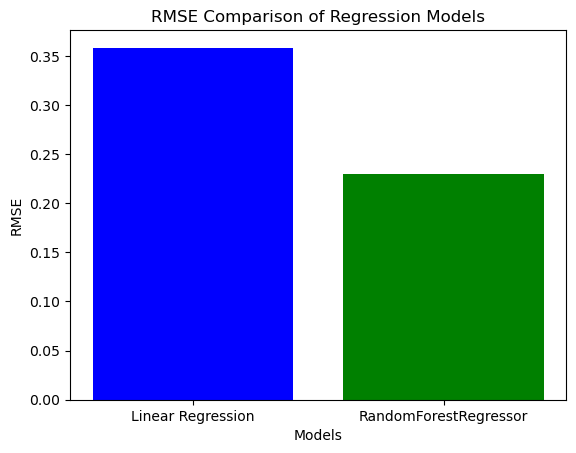

In [85]:
# Step 5: Plotting the comparison of 2 models
models = ['Linear Regression', 'RandomForestRegressor']
rmse_values = [rmse, rmse_random_forest]

pt.bar(models, rmse_values, color=['blue', 'green'])
pt.title('RMSE Comparison of Regression Models')
pt.xlabel('Models')
pt.ylabel('RMSE')
pt.show()

In [86]:
# Lower RMSE indicates better model performance.


In [87]:
# Hyper parameter tuning
# Explanation:
# Hyperparameter tuning is essential to find optimal set of parameters for a model,
# leading to better performance.
# GridSearchCV is used to systematically search through a predefined grid of hyperparameters.
# The chosen metric for tuning is negative mean squared error (neg_mean_squared_error).
# Lenear regression model isn't tuned because its simple and nothing much to tune.
# The final step evaluates the tuned models on the test set and displays their RMSE.

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Steps for hyper tuning
# Step 1: Splitting the data into training and testing sets
X = new_dataset.drop('Fraud', axis=1)  # Features
Y = new_dataset['Fraud']  # Target variable

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Step 2: Hyperparameter Tuning for Linear Regression
# No hyperparameters to tune for Linear Regression, as it's a simple model




In [89]:
#Hyperparameter Tuning for Random Forest
random_forest_model = RandomForestRegressor()

# Define the parameter grid to search
param_grid_random_forest = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Use GridSearchCV for hyperparameter tuning
grid_search_random_forest = GridSearchCV(random_forest_model, param_grid=param_grid_random_forest, scoring='neg_mean_squared_error', cv=5)
grid_search_random_forest.fit(X_train, Y_train)

# Get the best hyperparameters and the best model
best_params_random_forest = grid_search_random_forest.best_params_
best_model_random_forest = grid_search_random_forest.best_estimator_

In [90]:
# Evaluate the Tuned Models on the Test Set
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
y_pred_linear = linear_model.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(Y_test, y_pred_linear))


# Random Forest
y_pred_random_forest = best_model_random_forest.predict(X_test)
rmse_random_forest = np.sqrt(mean_squared_error(Y_test, y_pred_random_forest))

# Display RMSE for Tuned Models
print("RMSE - Linear Regression:", rmse_linear)
print("RMSE - Random Forest (Tuned):", rmse_random_forest)

RMSE - Linear Regression: 0.4648021406848591
RMSE - Random Forest (Tuned): 0.25529149283257435


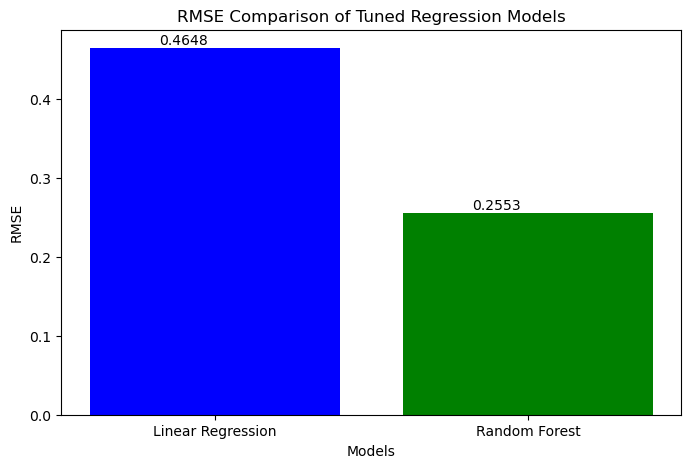

In [91]:
#Displaying the Best Tuned Models on a Graph
models = ['Linear Regression', 'Random Forest']
rmse_values_tuned = [rmse_linear, rmse_random_forest]

pt.figure(figsize=(8, 5))
bars_tuned = pt.bar(models, rmse_values_tuned, color=['blue', 'green'])

# Add labels to bars
for bar, label in zip(bars_tuned, rmse_values_tuned):
    pt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.005, round(label, 4), ha='center', color='black')

pt.title('RMSE Comparison of Tuned Regression Models')
pt.xlabel('Models')
pt.ylabel('RMSE')
pt.show()

In [92]:
import pickle

In [93]:
with open('model_pickle.pkl','wb') as f:
    pickle.dump(linear_model ,f)

In [94]:
with open('model_pickle','rb') as f:
    mp = pickle.load(f)

In [95]:
with open('random_pickle.pkl','wb') as f:
    pickle.dump(random_forest_model,f)


In [96]:
with open('random_pickle', 'rb') as f:
    rp = pickle.load(f)

In [97]:
mp

0.4597125125384979

In [98]:
rp

0.23529834489158905